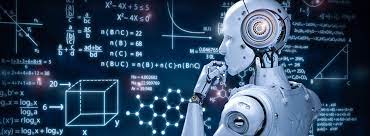

# Otimização de hiperparâmetros
- Escolha de Hiperparâmetros (tunagem de Modelos)

##   

## Escolha de Hiperparâmetros

Vamos ver na aula de hoje, como aprimorarmos os nosso modelo, onde já temos um modelo __baseline__ e uma __certa métrica__ com __boa performance__, mas vamos buscar refinar ainda mais a __escolha de parâmetros__ de forma a verificar se com outra combinações de parâmetros, se é possível __otimizar a performance do modelo__.<br><br>

### Entendendo os Hiperparâmetros

Antes de partimos para as técnicas de escolha de hiperparâmetros e otimização do nosso modelo, vamos começar entendendo que tipos de parâmetros temos disponíveis.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier

In [2]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
df = pd.read_csv('dados_modelo/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(columns=['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.shape

(7043, 20)

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
target = 'Churn'

df[target] = np.where(df[target] == 'Yes', 1, 0)

df[target].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [9]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=42, stratify=df[target])

In [10]:
n_zero, n_um = df_train[target].value_counts()
n_zero, n_um

(3622, 1308)

In [11]:
df_train_1 = df_train[df_train[target] == 1].copy()
df_train_0 = df_train[df_train[target] == 0].sample(n=n_um, replace=False, random_state=42).copy()

df_bal = pd.concat([df_train_1, df_train_0])
df_bal.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2270,Female,1,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,220.95,1
6930,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,1
898,Female,0,No,No,12,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.90,1120.95,1
6085,Female,0,No,No,3,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.65,151.30,1
6030,Female,0,No,No,43,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),49.05,2076.20,1


In [12]:
df_bal[target].value_counts()

1    1308
0    1308
Name: Churn, dtype: int64

In [13]:
X_train = df_bal.drop(columns=[target], axis=1)
X_test = df_test.drop(columns=[target], axis=1)

y_train = df_bal[target]
y_test = df_test[target]

In [14]:
features_num = df.select_dtypes(include=np.number).columns.tolist()
features_num.remove(target)

features_cat = df.select_dtypes(exclude=np.number).columns.tolist()

In [15]:
pipe_tr_features_num = Pipeline([
    ('tr_imput_mean', SimpleImputer(strategy='mean')),
    ('tr_min_max', StandardScaler())
])

In [16]:
pipe_tr_features_cat = Pipeline([
    ('tr_input_frequent', SimpleImputer(strategy='most_frequent')),
    ('tr_dummy', OneHotEncoder(drop='first'))
])

In [17]:
pre_processor = ColumnTransformer([
    ('tr_num', pipe_tr_features_num, features_num),
    ('tr_cat', pipe_tr_features_cat, features_cat)
])

In [18]:
pipe_final = Pipeline([
    ('pre_processor', pre_processor),
    ('est', RandomForestClassifier(random_state=42))
])

In [19]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_imput_mean',
                                                                   SimpleImputer()),
                                                                  ('tr_min_max',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('tr_input_frequent',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('tr_dummy',
                

In [20]:
y_pred = pipe_final.predict(X_test)

In [21]:
roc_auc_score(y_test, y_pred)

0.7598010502232758

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1552
           1       0.52      0.78      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



In [23]:
pipe_final.named_steps

{'pre_processor': ColumnTransformer(transformers=[('tr_num',
                                  Pipeline(steps=[('tr_imput_mean',
                                                   SimpleImputer()),
                                                  ('tr_min_max',
                                                   StandardScaler())]),
                                  ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                   'TotalCharges']),
                                 ('tr_cat',
                                  Pipeline(steps=[('tr_input_frequent',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('tr_dummy',
                                                   OneHotEncoder(drop='first'))]),
                                  ['gender', 'Partner', 'Dependents',
                                   'PhoneService', 'MultipleLines',
                                   'Int

In [25]:
pipe_final['pre_processor'].transformers_[1]

('tr_cat',
 Pipeline(steps=[('tr_input_frequent', SimpleImputer(strategy='most_frequent')),
                 ('tr_dummy', OneHotEncoder(drop='first'))]),
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [26]:
pipe_final['pre_processor'].transformers_[1][1][1].categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [28]:
pipe_final.named_steps['pre_processor'].transformers_[1][1].named_steps['tr_dummy'].get_feature_names(features_cat)

array(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [29]:
len(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])

26

**Será possível melhorar o desempenho do algoritmo modificando seus hiperparâmetros?**  
Sim, é possível...  
  
Dessa forma, é importante descobrir quais são os hiperparâmetros que criarão o melhor modelo para o cenário em questão, qual são os "números mágicos" que otimizarão o aprendizado do meu. Para um ou até dois parâmetros esse processo pode ser feito facilmente "na mão". Porém, à medida que a quantidade de hiperparâmetros aumenta, a quantidade de testes que temos que fazer aumentará exponencialmente e será bem útil fazer uso de algumas técnicas conhecidas.
  
**Diferenças entre Hiperparâmetro e Parâmetro**  
As nomenclaturas podem parecer um pouco confusas a primeira vista, mas são perceptíveis ao enxergar com mais atenção. Um parâmetro de um modelo é algo que será ajustado com no processo de treinamento dele. Como exemplo, podem ser citados os coeficientes da equação em uma Regressão Linear ou Logística ou as regras criadas pela Árvore de Decisão. Já um hiperparâmetro é uma configuração pré-definida de como o modelo se ajustará aos dados, definindo características construtivas do modelo.

## Técnicas de Otimização

Hoje iremos trabalhar com duas técnicas de otimização de modelos bem conhecidas e largamente utilizadas que são o __GridSearchCV__ e o __RandomizedSearchCV__:

### GridsearchCV

O GridSearchCV é uma técnica onde determinado os parâmetros que queremos testar no nosso modelo, ele vai __testar todas as combinações de cada um dos parâmetros__ e realizar um __Cross Validation__ para cada combinações e calcular uma dada métrica. A combinação que apresentar o __melhor desempenho da métrica__ será a __combinação otimizada__ para o nosso modelo <br><br>

__Importante!:__ Perceba que treinar __todas as combinações possíveis__ vai decorrer de um custo computacional muito alto, dessa forma apesar de ser a técnica mais utilizada, não é a melhor técnica a ser aplicada.

### RandomizedSearchCV

A ideia por trás do RandomizedSearchCV é análoga ao GridSearchCV, mas ao invés de testar todas as combinações de parâmetros, o RandomizedSearchCV testa __algumas combinações aleatórias dos parâmetros__, onde definimos a quantidade de iterações desse processo ele irá processar. A partir das combinações, o RandomizedSearchCV realiza o mesmo processo do GridSearchCV, faz o __Cross Validation__ e __calcula a métrica de acompanhamento__, por fim defini qual a melhor combinação de parâmetros.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-05318-5_1/MediaObjects/453309_1_En_1_Fig1_HTML.png" width=800>

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
  
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Até então discretizamos o espaço amotral, quando teu tenho poucos hiperparâmetros é fácil, imagine se fossem 10 parâmetros.  
Agora vamos explorar o espaço, por exemplo de forma aleatória, compartivo:

| Grid Search                             | Random Search                                     |
|-----------------------------------------|---------------------------------------------------|
| Preciso preparar e varrer todos valores | Varre alguns valores aleatoriamente               |
| Alto custo de tempo                     | Menor custo de tempo, pois não vamos varrer todos |
| Pode ser paralelizado                   | Pode ser paralelizado                             |
|                                         | Podemos otimizar (Não só para esse método)        |

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
espaco_hiperparametros= {
    'est__n_estimators': [50, 100, 200],
    'est__max_depth': [5, 10, 20]
}

In [32]:
n_cv = 15 #round(X_train.shape[0] ** 0.5)
n_cv

15

In [33]:
grid_search = GridSearchCV(pipe_final, param_grid=espaco_hiperparametros, scoring='roc_auc', cv=n_cv, verbose=2, n_jobs=31)

In [34]:
grid_search.fit(X_train, y_train)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.1s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.1s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.1s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.1s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.1s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.1s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.1s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.2s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.2s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.2s
[CV] END .............est__max_depth=5, est__n_estimators=50; total time=   0.2s
[CV] END .............est__max_depth=5, est__n_

GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('pre_processor',
                                        ColumnTransformer(transformers=[('tr_num',
                                                                         Pipeline(steps=[('tr_imput_mean',
                                                                                          SimpleImputer()),
                                                                                         ('tr_min_max',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                   

In [35]:
grid_search.best_score_

0.8472976895390687

In [36]:
grid_search.best_params_

{'est__max_depth': 5, 'est__n_estimators': 200}

In [37]:
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [39]:
roc_auc_score(y_test, y_pred)

0.7613889042027306

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1552
           1       0.50      0.82      0.62       561

    accuracy                           0.73      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.73      0.75      2113



In [41]:
df_result = pd.DataFrame(grid_search.cv_results_)
df_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__max_depth,param_est__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.130930,0.051402,0.009208,0.009135,5,50,"{'est__max_depth': 5, 'est__n_estimators': 50}",0.859848,0.833595,0.902299,...,0.869468,0.843705,0.854274,0.851103,0.847734,0.848593,0.837099,0.846294,0.025904,3
1,0.213796,0.086750,0.017757,0.025693,5,100,"{'est__max_depth': 5, 'est__n_estimators': 100}",0.858412,0.829545,0.904781,...,0.867882,0.840798,0.854802,0.849386,0.846611,0.852556,0.837363,0.846983,0.024570,2
2,0.402104,0.148710,0.016152,0.010313,5,200,"{'est__max_depth': 5, 'est__n_estimators': 200}",0.855016,0.830199,0.903866,...,0.867486,0.837495,0.858238,0.850310,0.848989,0.854538,0.839741,0.847298,0.024225,1
3,0.162700,0.072002,0.014750,0.023251,10,50,"{'est__max_depth': 10, 'est__n_estimators': 50}",0.847048,0.833203,0.865334,...,0.872903,0.841855,0.838420,0.854142,0.849782,0.847866,0.847932,0.840918,0.024827,6
4,0.383420,0.099057,0.028889,0.030355,10,100,"{'est__max_depth': 10, 'est__n_estimators': 100}",0.849007,0.838427,0.873171,...,0.875545,0.842383,0.837891,0.857313,0.856256,0.852821,0.848593,0.843818,0.025978,5


<AxesSubplot:>

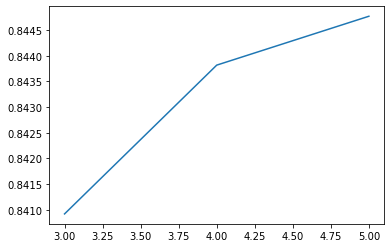

In [42]:
df_result[df_result['param_est__max_depth'] == 10]['mean_test_score'].plot()

In [43]:
grid_search.best_estimator_.n_features_in_

19

- RandomSearch

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
espaco_hiperparametros= {
    'est__n_estimators': range(580, 680),
    'est__max_depth': range(5, 10)
}

In [46]:
random_search = RandomizedSearchCV(pipe_final, 
                                   param_distributions=espaco_hiperparametros, 
                                   scoring='roc_auc', cv=n_cv, verbose=2, n_jobs=31, n_iter=20)

In [47]:
random_search.fit(X_train, y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.5s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.5s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.5s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.6s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.6s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.8s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.8s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.8s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.9s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   1.9s
[CV] END ............est__max_depth=5, est__n_estimators=597; total time=   2.0s
[CV] END ............est__max_depth=5, est__n_

RandomizedSearchCV(cv=15,
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('tr_num',
                                                                               Pipeline(steps=[('tr_imput_mean',
                                                                                                SimpleImputer()),
                                                                                               ('tr_min_max',
                                                                                                StandardScaler())]),
                                                                               ['SeniorCitizen',
                                                                                'tenure',
                                                                                'MonthlyCharges',
                                                                                'To

In [52]:
random_search.best_score_

0.8495492979737926

In [54]:
random_search.best_params_

{'est__n_estimators': 583, 'est__max_depth': 7}

In [55]:
y_pred = random_search.best_estimator_.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [56]:
roc_auc_score(y_test, y_pred)

0.7663718369259607

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1552
           1       0.51      0.82      0.63       561

    accuracy                           0.74      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.74      0.76      2113



In [58]:
grid_search.best_estimator_.n_features_in_

19

In [59]:
df_result = pd.DataFrame(random_search.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__n_estimators,param_est__max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,1.702446,0.200732,0.110566,0.083597,597,5,"{'est__n_estimators': 597, 'est__max_depth': 5}",0.853971,0.832941,0.903736,...,0.870525,0.840798,0.857313,0.848461,0.851896,0.854670,0.840005,0.847923,0.024664,17
1,3.951923,0.534126,0.141900,0.064679,629,9,"{'est__n_estimators': 629, 'est__max_depth': 9}",0.853187,0.840648,0.887147,...,0.874488,0.842780,0.849121,0.857445,0.855595,0.855331,0.851367,0.847567,0.024853,19
2,3.821470,0.292940,0.179790,0.073301,677,7,"{'est__n_estimators': 677, 'est__max_depth': 7}",0.856322,0.839864,0.896552,...,0.873960,0.847008,0.857709,0.852556,0.854935,0.855331,0.847404,0.849471,0.024395,4
3,3.335536,0.184072,0.133268,0.062401,655,5,"{'est__n_estimators': 655, 'est__max_depth': 5}",0.855016,0.832158,0.904911,...,0.870392,0.840798,0.857577,0.848329,0.852556,0.854670,0.840137,0.848150,0.024751,14
4,3.464125,0.237987,0.108439,0.062937,583,7,"{'est__n_estimators': 583, 'est__max_depth': 7}",0.856452,0.840387,0.896552,...,0.873695,0.846611,0.857709,0.852821,0.854538,0.854935,0.847536,0.849549,0.024347,1
5,3.543383,0.212633,0.137274,0.058939,587,8,"{'est__n_estimators': 587, 'est__max_depth': 8}",0.853971,0.839734,0.888584,...,0.874092,0.847140,0.853481,0.855859,0.854538,0.855595,0.850707,0.848655,0.024422,12
6,3.843972,0.131384,0.163864,0.058820,582,9,"{'est__n_estimators': 582, 'est__max_depth': 9}",0.853187,0.841301,0.886494,...,0.874488,0.842119,0.849386,0.857181,0.855595,0.854406,0.850707,0.847419,0.024779,20
7,3.163777,0.185171,0.143413,0.069871,652,5,"{'est__n_estimators': 652, 'est__max_depth': 5}",0.855146,0.832158,0.904781,...,0.870260,0.840666,0.857709,0.848329,0.852424,0.855067,0.840137,0.848115,0.024741,15
8,3.174547,0.170304,0.135969,0.049852,607,7,"{'est__n_estimators': 607, 'est__max_depth': 7}",0.856322,0.840648,0.896029,...,0.873960,0.847008,0.857445,0.853349,0.854802,0.854538,0.847800,0.849506,0.024452,3
9,2.809030,0.136457,0.125461,0.039224,586,5,"{'est__n_estimators': 586, 'est__max_depth': 5}",0.854232,0.832811,0.903344,...,0.870260,0.840534,0.857577,0.848725,0.851367,0.854935,0.840270,0.847879,0.024615,18
